In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train[1234].shape

(28, 28)

In [6]:
# CNN要的是(28, 28, 1)

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [9]:
x_train[1234].shape

(28, 28, 1)

In [10]:
X = x_train[1234]

In [11]:
X = X.reshape(28, 28)

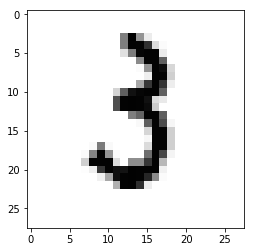

In [18]:
plt.imshow(X, cmap='Greys')

In [14]:
from keras.utils import np_utils

In [15]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
y_train[1234]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [17]:
x_train = x_train/255
x_test = x_test/255

Input --> 4(5x5) --> 8(5x5) --> 16(5x5) -->9 --> Ouput(10)

一般CNN的filter會隨層數增加而變多，且都為2的倍數

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(4, (5, 5), padding = 'same', input_shape = (28, 28, 1)))
model.add(Activation('relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [23]:
model.add(Conv2D(8, (5, 5), padding = 'same'))
model.add(Activation('relu'))

In [24]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [25]:
model.add(Conv2D(16, (5, 5), padding = 'same'))
model.add(Activation('relu'))

In [26]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [27]:
model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

In [28]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [29]:
model.compile(loss = 'mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
__________

4 filters: 5x5=25, 25x4=100

add bias: 100+4=104

In [31]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 34s 561us/step - loss: 0.0898 - acc: 0.1217
Epoch 2/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0896 - acc: 0.2115
Epoch 3/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0893 - acc: 0.2387
Epoch 4/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0887 - acc: 0.2417
Epoch 5/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0872 - acc: 0.2461
Epoch 6/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0824 - acc: 0.2669
Epoch 7/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0718 - acc: 0.3964
Epoch 8/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0479 - acc: 0.6397
Epoch 9/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0273 - acc: 0.8199
Epoch 10/10
60000/60000 [=================